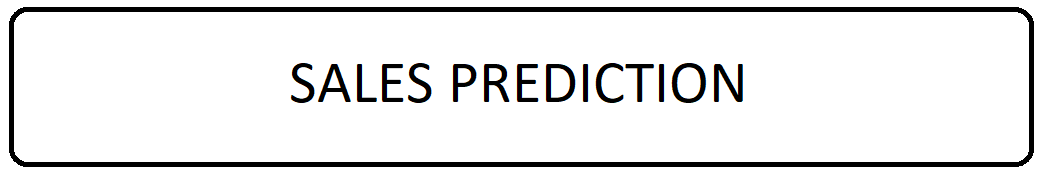

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

## Loading dataset

In [2]:
sales_df=pd.read_csv('advertising.csv')

In [3]:
sales_df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## Information about dataset

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Checking Null Values

In [5]:
sales_df.isnull().sum()/len(sales_df)*100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

- No null values

## Checking outliers

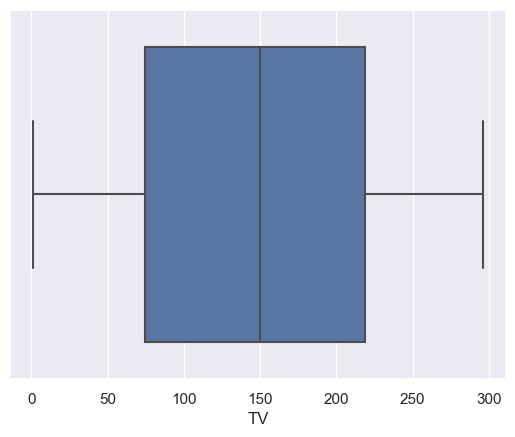

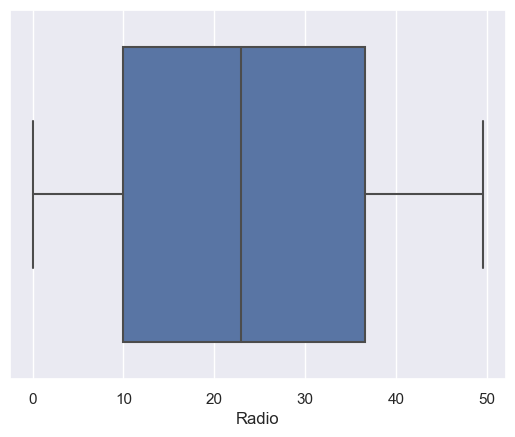

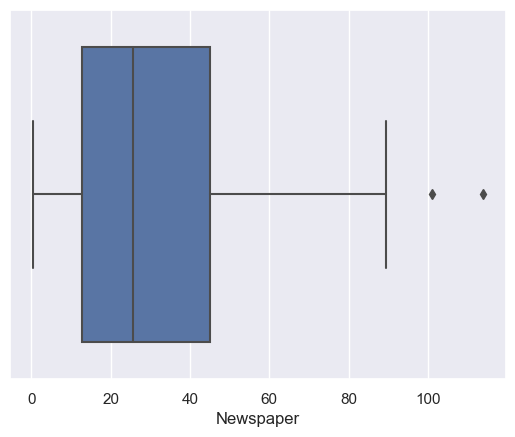

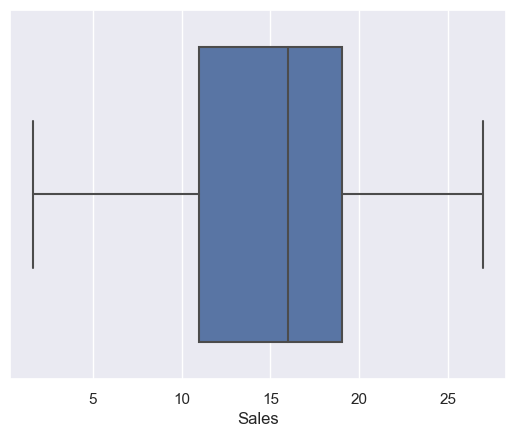

In [6]:
for i in sales_df.columns:
    sns.boxplot(sales_df[i])
    plt.show()

- News paper have outliers but its needed for prediction of sales

In [7]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## splitting data into idv and dv

In [8]:
x=sales_df.drop('Sales',axis=1)
y=sales_df[['Sales']]

# Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

## HEATMAP

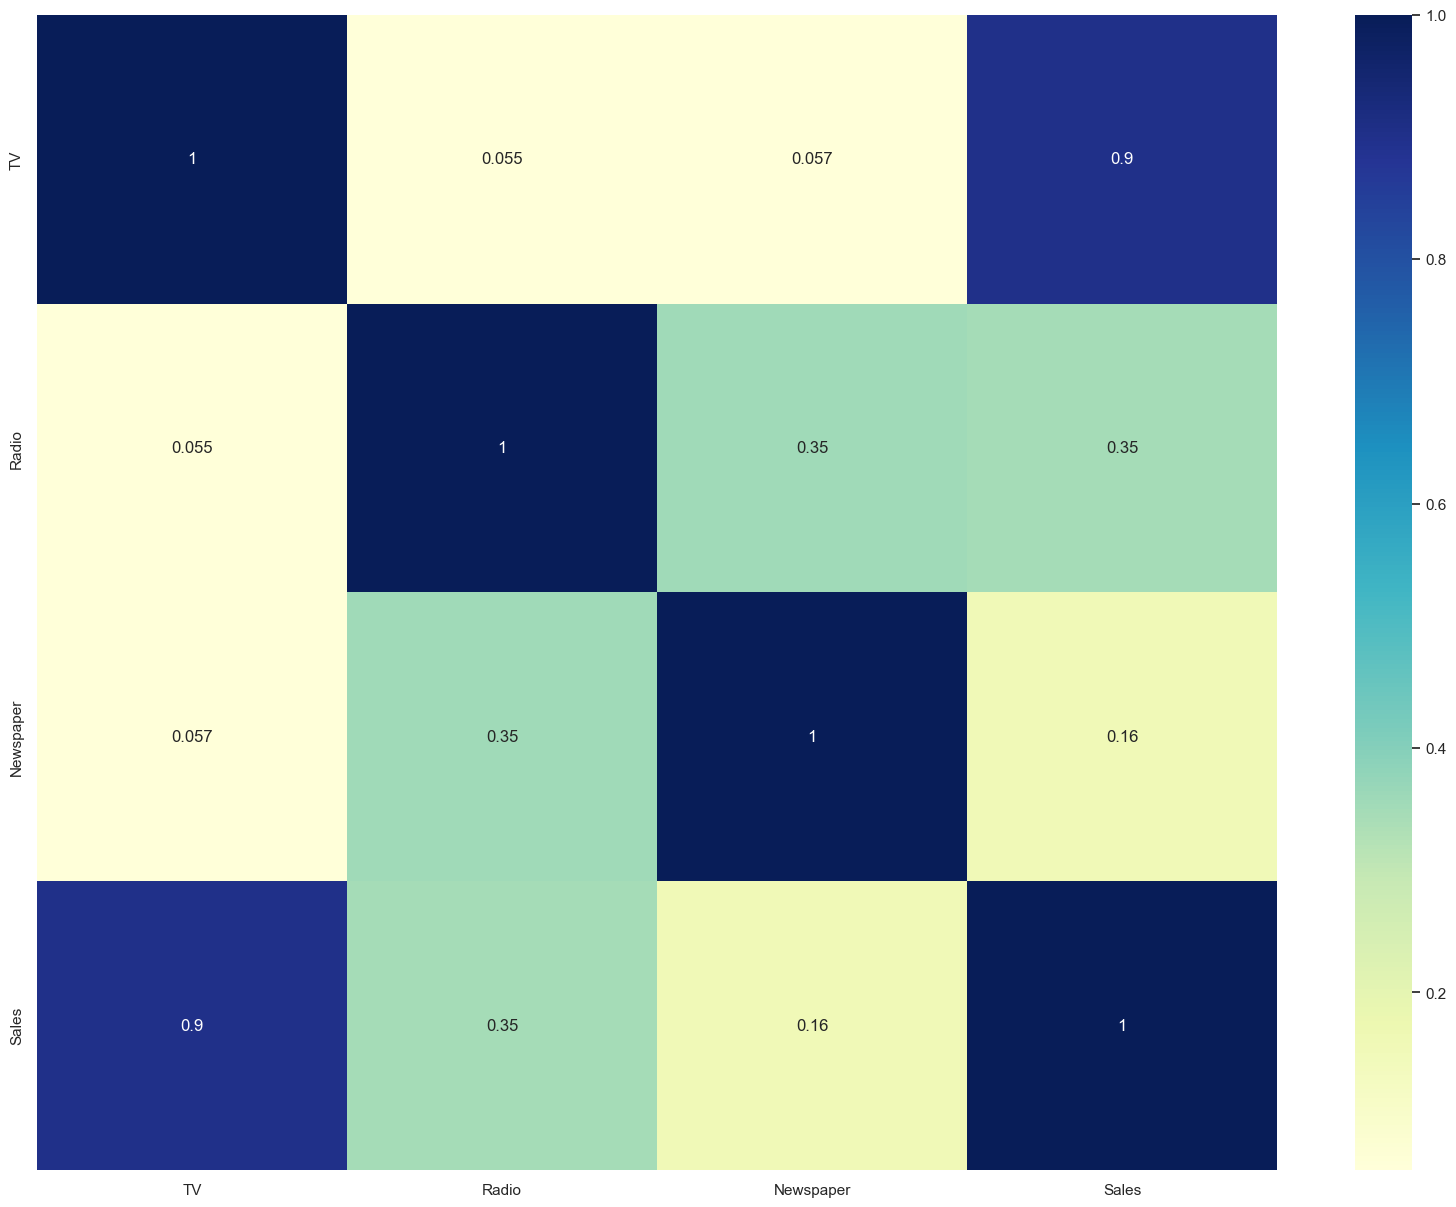

In [11]:
plt.figure(figsize=(20,15))
corr = sales_df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

## Splitting data into Train and Test

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc,y,test_size=0.25,random_state=101)

## Model building

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [14]:
#linear
linear=LinearRegression()

In [15]:
#DecisionTree
dtree=DecisionTreeRegressor()

In [16]:
#Bagging
bagg=BaggingRegressor()

In [17]:
#Randomforest
rf=RandomForestRegressor()

In [18]:
#Boosting
gb=GradientBoostingRegressor()
xgb=XGBRegressor()

In [19]:
#K nearest neighbor
knn=KNeighborsRegressor()

In [20]:
#SVM
svm=SVR()

In [22]:
list1=[(linear,'linear',1),(dtree,'decisiontree',2),(bagg,'bagging',3),(rf,'randomforest',4),(gb,'GradientBoost',5),(xgb,'XGBoost',6),(knn,'KNN',7),(svm,'SVM',8)]

In [23]:
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('#'*75)
    print(f'Cross validation of {model_name}')
    Train_cvs=cross_val_score(model,x_train,y_train,cv=10).mean()
    Test_cvs=cross_val_score(model,x_test,y_test,cv=10).mean()
    variance=abs(Train_cvs-Test_cvs)
    print('Train cvs:',Train_cvs)
    print('Test cvs:',Test_cvs)
    print('variance:',variance)
    if variance>0.1 :
        print(f'Overfitting {model_name}')

###########################################################################
Cross validation of linear
Train cvs: 0.8917209999642047
Test cvs: 0.7374997551511149
variance: 0.15422124481308985
Overfitting linear
###########################################################################
Cross validation of decisiontree
Train cvs: 0.875905060914054
Test cvs: 0.6921956245598697
variance: 0.18370943635418424
Overfitting decisiontree
###########################################################################
Cross validation of bagging
Train cvs: 0.9242126328310677
Test cvs: 0.7845999769723072
variance: 0.13961265585876048
Overfitting bagging
###########################################################################
Cross validation of randomforest
Train cvs: 0.9320752005647484
Test cvs: 0.8190468531331749
variance: 0.11302834743157342
Overfitting randomforest
###########################################################################
Cross validation of GradientBoost
Train cvs: 0.93642829

## REGULARIZATION TECHNIQUE

## LASSO 

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)
print('Lasso coefficient:',lasso.coef_)
print()
print('y_pred_test_lasso:',lasso.predict(x_test))
print()
print('y_pred_train_lasso:',lasso.predict(x_train))
print()
print('Accuracy of train value:',r2_score(y_train,y_pred_train_lasso))
print()
print('Accuracy of test value:',r2_score(y_test,y_pred_test_lasso))

Lasso coefficient: [ 4.60834434  1.51564649 -0.        ]

y_pred_test_lasso: [13.85078889 21.27175825 12.63143279 15.5758106   8.98807273  7.45681886
 21.8590286  18.77630693 12.51955756 20.03850544 10.9446117  15.80608448
 17.09095944 20.53412418 18.82152074  9.82118911 19.28054208 10.06841278
  8.65313357 20.9026268   7.88718265 18.05622264 24.68021696 23.20624476
  9.44015772 15.84412663 23.40921472  9.21065661 14.70994667 10.39845572
  9.64831686 20.03154024 12.50371666  7.11295602 17.71819212 10.15936357
 10.67537386 10.34589263  9.1814182  13.46831735 12.16951685 12.49697707
 11.46669906  8.00788075 11.61910779 10.59714862  8.12601551 18.61829149
 15.60974846 20.17180428]

y_pred_train_lasso: [11.19204183 16.76859704 20.88692984 12.58649741 15.79295571  6.18320532
 23.62016281 11.10720179 21.11447245 16.50042495 17.0548038  24.65217854
  9.09106256 19.32950977 17.1830671  22.01209015 17.040547   13.77303885
 15.31588054 16.21027723 17.74207342  9.41735162 21.58793308  8.96845396


## RIDGE

In [26]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.3)
ridge.fit(x_train,y_train)
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)
print('Ridge coefficient:',ridge.coef_)
print()
print('y_pred_test_ridge:',ridge.predict(x_test))
print()
print('y_pred_train_ridge:',ridge.predict(x_train))
print()
print('Accuracy of train value:',r2_score(y_train,y_pred_train_ridge))
print()
print('Accuracy of test value:',r2_score(y_test,y_pred_test_ridge))

Ridge coefficient: [[ 4.70178398  1.63154623 -0.07628086]]

y_pred_test_ridge: [[13.91603872]
 [21.49923876]
 [12.51286172]
 [15.64682124]
 [ 8.96484743]
 [ 7.28251011]
 [22.07282534]
 [18.913276  ]
 [12.41351559]
 [20.16344309]
 [11.01728601]
 [15.86749225]
 [17.07183782]
 [20.68467429]
 [18.80205673]
 [ 9.75714849]
 [19.28391932]
 [ 9.91541366]
 [ 8.49147198]
 [21.09168136]
 [ 7.7637887 ]
 [18.17905004]
 [24.97586509]
 [23.39105465]
 [ 9.34267554]
 [15.7225048 ]
 [23.69762737]
 [ 8.97586955]
 [14.66470183]
 [10.29070962]
 [ 9.47519008]
 [20.13278023]
 [12.41355268]
 [ 6.8352402 ]
 [17.79442377]
 [ 9.92942725]
 [10.52953066]
 [10.21618982]
 [ 9.08186091]
 [13.38799615]
 [11.88724091]
 [12.32982773]
 [11.30850599]
 [ 7.7788565 ]
 [11.59072859]
 [10.52643803]
 [ 8.09050885]
 [18.57223148]
 [15.44408593]
 [20.33016202]]

y_pred_train_ridge: [[11.14740552]
 [16.72499255]
 [20.95416262]
 [12.5680646 ]
 [15.71447294]
 [ 6.0160571 ]
 [23.99420523]
 [11.20919271]
 [21.31734187]
 [16.51456224]

In [27]:
list2=[(linear,'linear',1),(dtree,'decisiontree',2),(bagg,'bagging',3),(rf,'randomforest',4),(gb,'GradientBoost',5),(xgb,'XGBoost',6),(knn,'KNN',7),(svm,'SVM',8),(lasso,'lasso',9),(ridge,'ridge',10)]

In [28]:
accuracy_list=[]
for model,model_name,i in list2:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    test_acc=r2_score(y_test,y_pred_test)
    accuracy_list.append(test_acc)

In [29]:
model=['linear','decisiontree','bagging','randomforest','GradientBoost','XGBoost','KNN','SVM','Lasso','Ridge']

In [31]:
metrics_df=pd.DataFrame({'model_name':model,'Accuracy':accuracy_list})

In [32]:
metrics_df

,model_name,Accuracy
0,linear,0.894901
1,decisiontree,0.942372
2,bagging,0.938158
3,randomforest,0.953522
4,GradientBoost,0.940458
5,XGBoost,0.943435
6,KNN,0.900521
7,SVM,0.864621
8,Lasso,0.897872
9,Ridge,0.895109


## Summary

### We can observe that all models predicted and gave best accuracy.
### BEST MODEL:RandomForest